In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, ShuffleSplit, learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,r2_score
import pandas_profiling
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif, RFE
from sklearn import metrics, preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from imblearn.over_sampling import ADASYN, SMOTE
import collections
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib as mpl
import scipy as sp

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [30]:
data=pd.read_csv('Dataset/final_dataframe.csv',sep=",")

In [31]:
X = data.drop(['PATIENT_ID'],axis=1)

# data =data.groupby('CELLULARITY').filter(lambda x: len(x) > 10)
# data.groupby('CELLULARITY').count()

features = X.iloc[:,0:24360]
label = X['CELLULARITY']

features
label

# X.loc[(X['CELLULARITY'] == 0) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 0)] 
# # high cellularity, not gone for chemo and person deceased

0       0
1       0
2       2
3       0
4       0
       ..
1119    2
1120    1
1121    1
1122    2
1123    1
Name: CELLULARITY, Length: 1124, dtype: int64

In [14]:
X.loc[(X['CELLULARITY'] == 0) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 0)] 
# high cellularity, gone for chemo and person deceased

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,CNPY3,C19orf24,GAS2L2,AA913006,C21orf33,DA442494,P2RX1,CD515666,LRR1,ATP1B2,BM668203,UBLCP1,BG236224,ADAMTSL4,BX109195,IL28B,DES,HERC2P9,BC033582,PRR16,HIPK2,SHMT2,MRPS5,SNORD36C,CHRNA6,TBC1D22A,RPL35,AI251715,ST6GALNAC4,TM2D1,RASD2,BM987095,CD364315,UBE2DNL,TFAP2D,ITGA10,LYRM5,LPPR1,MARS2,MAGEC1,PDIA6,FLJ41130,SLC25A25,BX109285,AI979035,FGFBP2,LRRC23,PNCK,CA429570,RPS24,C14orf102,AA885282,GLT8D2,AW516315,IGM1,EFCAB4A,REEP3,ECI2,BTBD3,AI808614,RBM17,LOC339524,TRNAU1AP,IL21R,AK094525,RASSF4,BM676998,PLXNB2,OR8H2,ANTXR2,...,BM669183,WDR86,AK125333,AA682183,FNBP4,OASL,KRT25,BC047373,TMSB10,AK093382,GNB2L1,ROBO2,AI889605,LAMB2,LGALS16,EPHA8,RPL36A,OR51I2,BX106374,FLJ00219,OSBPL1A,GNA11,TRMT1,EXPH5,AI688818,EHBP1,AI248940,VN1R5,PSAP,USP47,OR2M7,ZNF322B,TGFBI,AI732555,ERI1,KIAA1033,METTL11A,CALCA,C15orf56,FAM20B,SLC39A6,TIMP1,DCTPP1,BACH2,FGFBP1,INPP5F,CR987215,ZNF683,MFAP1,DB299844,TMEM168,AI281566,DKFZp434A149,STUB1,CA841087,ELANE,SHISA2,BCAT1,BU738502,NCKAP1L,TMEM146,AK098705,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,RAB4B-EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,LOC283104,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,OS_STATUS,VITAL_STATUS,RADIO_THERAPY,BREAST_SURGERY,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,5.332863,5.275676,5.443896,5.391825,5.332039,6.654909,6.116269,5.502459,6.170848,10.014262,6.223714,5.282517,5.453830,5.393823,6.781114,7.504079,5.180251,8.852986,10.166590,6.338942,7.830940,7.759911,5.541563,5.334757,8.293493,5.190575,5.795106,5.557441,8.133722,6.463731,5.307319,5.908626,5.488834,6.182267,5.420022,5.113390,5.343218,5.436472,5.507741,6.609982,7.655179,9.918027,7.681965,5.758287,5.865935,5.955601,10.887942,5.495339,7.161620,8.606975,6.547162,5.552680,5.300537,5.262386,5.291624,6.055029,8.443535,5.703733,6.009303,5.412335,8.507808,5.441407,8.378318,5.207942,5.242395,5.874227,6.887747,6.516466,5.457306,7.313840,9.530002,5.252884,8.276766,5.393311,5.866986,10.027106,6.550112,8.188227,6.848986,5.224915,8.410104,5.352241,6.131702,5.652824,5.307057,6.357526,5.279424,9.634034,5.242926,7.675268,...,5.410691,5.917027,5.322450,5.504930,8.590845,6.691999,5.362862,5.406348,13.788297,5.175129,13.432720,6.903065,5.313997,9.612701,5.281570,5.790741,5.988035,5.553192,5.439954,5.350451,8.557414,8.793187,7.422380,6.864604,5.309307,7.644003,5.381085,5.384463,12.289552,5.803364,5.132420,5.334970,11.594719,5.404300,5.042365,5.321839,7.197625,5.048682,5.360249,8.871023,10.567694,13.280314,10.677717,5.362465,5.192630,6.239050,5.443849,5.839094,8.052659,5.595163,6.644065,5.328186,5.438294,9.900976,5.102717,5.485229,9.554390,6.646690,5.250567,6.171017,5.345515,5.289049,6.642358,5.384824,5.624982,5.244877,8.245886,11.179554,6.108972,9.144958,5.172836,5.623032,5.548618,5.335488,5.309543,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,0,1,1,2,1,0,0,0,1,1,1,1,0,1,0,15.0
15,8.549045,5.517149,5.600478,5.289742,5.532940,5.209777,7.316159,5.120236,5.755189,6.845702,6.636138,5.520360,5.656812,5.708719,5.369513,6.735887,5.783733,5.414899,6.291526,9.595639,6.175364,5.582536,5.708730,5.322623,6.599022,5.466945,5.669993,7.990176,9.949489,7.262885,7.905678,7.619526,5.431969,5.113743,9.044163,5.274212,5.839009,5.554093,7.625475,6.502723,5.119114,6.381757,5.243903,7.026185,5.408767,5.449989,5.310389,5.652051,5.265446,6.485133,7.274671,10.276871,8.184552,5.767175,5.955933,5.478767,10.923588,5.257828,8.220464,9.092648,7.918604,5.325101,5.271545,5.345137,5.440490,5.558145,9.930660,6.246211,6.558956,5.309790,8.702274,5.550509,8.281772,5.456590,5.141986,5.589753,5.586112,9.092927,5.536349

In [9]:
X.loc[(X['CELLULARITY'] == 0) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 1)] 
# high cellularity, not gone for chemo and person living

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,CNPY3,C19orf24,GAS2L2,AA913006,C21orf33,DA442494,P2RX1,CD515666,LRR1,ATP1B2,BM668203,UBLCP1,BG236224,ADAMTSL4,BX109195,IL28B,DES,HERC2P9,BC033582,PRR16,HIPK2,SHMT2,MRPS5,SNORD36C,CHRNA6,TBC1D22A,RPL35,AI251715,ST6GALNAC4,TM2D1,RASD2,BM987095,CD364315,UBE2DNL,TFAP2D,ITGA10,LYRM5,LPPR1,MARS2,MAGEC1,PDIA6,FLJ41130,SLC25A25,BX109285,AI979035,FGFBP2,LRRC23,PNCK,CA429570,RPS24,C14orf102,AA885282,GLT8D2,AW516315,IGM1,EFCAB4A,REEP3,ECI2,BTBD3,AI808614,RBM17,LOC339524,TRNAU1AP,IL21R,AK094525,RASSF4,BM676998,PLXNB2,OR8H2,ANTXR2,...,BM669183,WDR86,AK125333,AA682183,FNBP4,OASL,KRT25,BC047373,TMSB10,AK093382,GNB2L1,ROBO2,AI889605,LAMB2,LGALS16,EPHA8,RPL36A,OR51I2,BX106374,FLJ00219,OSBPL1A,GNA11,TRMT1,EXPH5,AI688818,EHBP1,AI248940,VN1R5,PSAP,USP47,OR2M7,ZNF322B,TGFBI,AI732555,ERI1,KIAA1033,METTL11A,CALCA,C15orf56,FAM20B,SLC39A6,TIMP1,DCTPP1,BACH2,FGFBP1,INPP5F,CR987215,ZNF683,MFAP1,DB299844,TMEM168,AI281566,DKFZp434A149,STUB1,CA841087,ELANE,SHISA2,BCAT1,BU738502,NCKAP1L,TMEM146,AK098705,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,RAB4B-EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,LOC283104,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,OS_STATUS,VITAL_STATUS,RADIO_THERAPY,BREAST_SURGERY,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,5.398675,5.409761,5.512298,5.452995,5.409993,6.270448,5.882995,5.314793,6.059837,8.952057,6.113587,5.539569,5.897422,5.602036,6.708135,5.238189,5.407080,8.862339,10.627204,7.861521,8.504881,8.472334,5.425727,5.477934,8.196948,5.371515,5.405208,5.251939,7.565383,6.681693,5.446783,6.247465,5.336722,5.506613,5.492948,5.469043,5.297980,5.404686,5.391362,6.163621,7.108554,9.624116,7.788535,5.963541,5.898053,5.577269,11.221420,5.330801,6.706887,8.729167,6.502233,5.617709,5.246967,5.183769,5.511785,5.878869,8.644469,5.961784,6.209489,5.281649,8.352159,5.473734,7.733238,5.455000,5.563600,5.605909,6.447382,6.152927,5.316938,8.656425,8.729495,5.413695,8.263818,5.420701,6.147548,9.074081,5.833985,8.405749,7.363565,5.368844,9.172103,5.266235,6.017158,5.764743,5.529966,6.239662,5.441766,9.818408,5.503801,7.498313,...,5.608421,5.808271,5.485120,5.404431,9.133232,6.350910,5.230948,5.167182,13.476168,5.323246,13.636697,5.287578,5.187742,8.866197,5.280978,5.490869,6.655432,5.373620,5.340025,5.515221,9.575858,8.890557,7.563462,6.588677,5.286744,7.484137,5.953192,5.387886,12.279785,5.951275,5.117281,5.476574,10.954100,5.480309,4.989634,5.285978,6.804698,5.148768,5.370606,8.994556,10.929505,13.166385,10.570911,5.441554,5.444633,6.262413,5.740688,5.720315,7.979611,5.404093,6.493452,5.565505,5.488457,10.180818,5.429302,5.342227,6.965049,6.612391,5.553623,6.494129,5.294164,5.420128,6.413538,5.457784,5.438267,5.126400,7.992744,10.642113,6.999086,7.219965,5.655266,5.966010,5.792747,5.520733,5.419803,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,0,0,1,2,1,0,1,2,1,0,1,1,0,1,0,18.0
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,5.266674,5.490693,5.363378,5.635478,5.376543,6.575093,5.766303,5.303814,6.427345,9.294008,6.218404,5.121197,5.424916,5.536605,6.972232,5.332220,5.628958,8.991660,11.113856,6.785893,7.427664,7.623515,5.215198,5.237407,8.099301,5.306056,5.949686,4.993865,7.270413,7.026337,5.713625,6.258711,5.391424,5.749602,5.030004,5.318001,5.324387,5.402966,5.264081,6.460239,7.489580,9.253191,7.977768,5.537113,6.152662,5.407330,11.082407,5.291600,6.548381,8.591014,5.612337,5.316403,5.388357,5.371222,5.558385,6.409593,8.236119,5.803719,6.439574,5.258578,8.739558,5.404354,8.307986,5.277244,5.265752,5.504789,6.285075,6.850872,5.492825,7

In [15]:
X.loc[(X['CELLULARITY'] == 0) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 1)] 
# high cellularity, gone for chemo and person living

In [17]:
X.loc[(X['CELLULARITY'] == 1) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 0)] 
# Low cellularity, not gone for chemo and person deceased

In [17]:
X.loc[(X['CELLULARITY'] == 1) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 0)] 
# Low cellularity, not gone for chemo and person deceased

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,CNPY3,C19orf24,GAS2L2,AA913006,C21orf33,DA442494,P2RX1,CD515666,LRR1,ATP1B2,BM668203,UBLCP1,BG236224,ADAMTSL4,BX109195,IL28B,DES,HERC2P9,BC033582,PRR16,HIPK2,SHMT2,MRPS5,SNORD36C,CHRNA6,TBC1D22A,RPL35,AI251715,ST6GALNAC4,TM2D1,RASD2,BM987095,CD364315,UBE2DNL,TFAP2D,ITGA10,LYRM5,LPPR1,MARS2,MAGEC1,PDIA6,FLJ41130,SLC25A25,BX109285,AI979035,FGFBP2,LRRC23,PNCK,CA429570,RPS24,C14orf102,AA885282,GLT8D2,AW516315,IGM1,EFCAB4A,REEP3,ECI2,BTBD3,AI808614,RBM17,LOC339524,TRNAU1AP,IL21R,AK094525,RASSF4,BM676998,PLXNB2,OR8H2,ANTXR2,...,BM669183,WDR86,AK125333,AA682183,FNBP4,OASL,KRT25,BC047373,TMSB10,AK093382,GNB2L1,ROBO2,AI889605,LAMB2,LGALS16,EPHA8,RPL36A,OR51I2,BX106374,FLJ00219,OSBPL1A,GNA11,TRMT1,EXPH5,AI688818,EHBP1,AI248940,VN1R5,PSAP,USP47,OR2M7,ZNF322B,TGFBI,AI732555,ERI1,KIAA1033,METTL11A,CALCA,C15orf56,FAM20B,SLC39A6,TIMP1,DCTPP1,BACH2,FGFBP1,INPP5F,CR987215,ZNF683,MFAP1,DB299844,TMEM168,AI281566,DKFZp434A149,STUB1,CA841087,ELANE,SHISA2,BCAT1,BU738502,NCKAP1L,TMEM146,AK098705,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,RAB4B-EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,LOC283104,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,OS_STATUS,VITAL_STATUS,RADIO_THERAPY,BREAST_SURGERY,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE
882,9.034275,8.410636,5.107246,5.197517,5.937892,7.365611,8.030592,5.366894,5.774697,6.784536,5.507218,5.655477,5.434630,5.326037,5.217843,5.768874,5.764360,5.415773,6.257763,8.637644,7.255700,5.398224,5.991081,5.380557,6.655980,5.354376,5.682195,7.328802,9.947889,7.480482,6.623023,7.409891,5.561260,5.508403,7.216708,5.298006,5.935411,5.410839,7.529182,6.692340,5.225543,6.563179,5.361028,5.948957,5.357167,5.484926,5.422334,5.376923,5.234841,5.964893,8.447425,10.239395,7.967783,6.731534,5.810663,5.500280,11.760436,5.328148,7.979225,8.393486,6.821076,5.603809,5.362002,5.154132,5.488934,6.312787,8.675061,5.881685,6.461626,5.407629,7.205629,5.769963,8.776852,5.380438,5.264167,5.442255,5.773458,6.299359,5.778717,8.155661,10.184309,5.314124,6.320715,5.291715,5.907025,9.698285,5.794484,8.821396,6.061484,5.383519,8.702133,5.599448,5.740275,6.080220,5.451084,6.842378,5.411413,9.046119,5.131816,7.017244,...,5.525100,5.851978,5.556129,5.174654,10.214958,7.217138,5.367819,5.316981,13.671824,5.371865,13.846085,5.346999,5.408387,9.323536,5.194204,5.340534,7.431725,5.144785,5.570639,5.369181,9.871191,10.310575,8.332768,7.009990,5.388582,8.102342,5.847039,5.408569,13.058459,6.467732,5.218602,5.490577,10.654395,5.338586,5.372890,5.282562,6.567238,5.381759,5.277660,9.550834,9.799549,12.419994,8.674740,5.391601,5.171876,6.211314,5.601995,6.309350,7.596215,5.444668,5.766908,5.648715,5.313886,8.521267,5.384295,5.454672,5.343353,5.733710,5.383855,7.206058,5.241606,5.707769,5.698745,5.358033,5.321200,5.260315,7.665343,10.940522,7.136391,7.313613,5.563996,6.303421,5.303227,5.715087,5.545449,5.340174,5.030555,8.371308,8.001786,5.413279,6.794698,5.427143,6.835902,5.173100,1,0,1,1,1,0,0,1,1,0,1,1,0,0,0,17.0
883,8.827923,5.328265,5.352206,5.234955,5.956871,5.805514,8.159564,5.359994,5.734994,5.913090,5.466134,6.240362,5.439473,5.653775,5.379011,6.434796,6.197993,5.326499,6.392997,9.806266,6.321879,5.236479,6.405501,5.334113,7.051099,5.386005,5.342129,7.929028,10.063176,6.917607,7.780339,8.073187,5.626990,5.481081,8.162512,5.442803,5.748946,5.337117,7.560101,6.364493,5.445730,7.153488,5.311221,5.771819,5.583083,5.446005,5.537707,5.619831,5.512492,6.180701,8.682265,8.953343,7.748630,5.730301,5.549023,5.997610,11.284866,5.331713,7.624023,10.092698,6.946620,5.359502,5.288600,5.547939,5.417701,6.301951,8.782773,5.876084,6.218838,5.537690,8.228968,5.561260,7.974327,5.433915,5.070775,5.548378,5.560725,8.675588,5.487

In [21]:
X.loc[(X['CELLULARITY'] == 1) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 1)] 
# Low cellularity, not gone for chemo and person living

X.loc[(X['CELLULARITY'] == 1) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 1)] 
# Low cellularity, gone for chemo and person living

X.loc[(X['CELLULARITY'] == 1) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 0)] 
# Low cellularity, gone for chemo and person living

In [22]:
X.loc[(X['CELLULARITY'] == 2) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 1)] 
# moderate cellularity, gone for chemo and person living

In [23]:
X.loc[(X['CELLULARITY'] == 2) & (X['CHEMOTHERAPY'] == 1) & (X['OS_STATUS'] == 0)] 
# moderate cellularity, gone for chemo and person deceased

In [24]:
X.loc[(X['CELLULARITY'] == 2) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 0)] 
# moderate cellularity, not gone for chemo and person deceased

In [25]:
X.loc[(X['CELLULARITY'] == 2) & (X['CHEMOTHERAPY'] == 0) & (X['OS_STATUS'] == 1)] 
# moderate cellularity, not gone for chemo and person living

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,HGC6.1.1,OR1J2,GNG5,TAF15,EXTL3,CNPY3,C19orf24,GAS2L2,AA913006,C21orf33,DA442494,P2RX1,CD515666,LRR1,ATP1B2,BM668203,UBLCP1,BG236224,ADAMTSL4,BX109195,IL28B,DES,HERC2P9,BC033582,PRR16,HIPK2,SHMT2,MRPS5,SNORD36C,CHRNA6,TBC1D22A,RPL35,AI251715,ST6GALNAC4,TM2D1,RASD2,BM987095,CD364315,UBE2DNL,TFAP2D,ITGA10,LYRM5,LPPR1,MARS2,MAGEC1,PDIA6,FLJ41130,SLC25A25,BX109285,AI979035,FGFBP2,LRRC23,PNCK,CA429570,RPS24,C14orf102,AA885282,GLT8D2,AW516315,IGM1,EFCAB4A,REEP3,ECI2,BTBD3,AI808614,RBM17,LOC339524,TRNAU1AP,IL21R,AK094525,RASSF4,BM676998,PLXNB2,OR8H2,ANTXR2,...,BM669183,WDR86,AK125333,AA682183,FNBP4,OASL,KRT25,BC047373,TMSB10,AK093382,GNB2L1,ROBO2,AI889605,LAMB2,LGALS16,EPHA8,RPL36A,OR51I2,BX106374,FLJ00219,OSBPL1A,GNA11,TRMT1,EXPH5,AI688818,EHBP1,AI248940,VN1R5,PSAP,USP47,OR2M7,ZNF322B,TGFBI,AI732555,ERI1,KIAA1033,METTL11A,CALCA,C15orf56,FAM20B,SLC39A6,TIMP1,DCTPP1,BACH2,FGFBP1,INPP5F,CR987215,ZNF683,MFAP1,DB299844,TMEM168,AI281566,DKFZp434A149,STUB1,CA841087,ELANE,SHISA2,BCAT1,BU738502,NCKAP1L,TMEM146,AK098705,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,RAB4B-EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,LOC283104,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,OS_STATUS,VITAL_STATUS,RADIO_THERAPY,BREAST_SURGERY,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,5.482155,5.463788,5.254294,5.405767,5.306545,6.290807,6.202997,5.166248,5.881027,8.811785,6.532682,5.436369,5.381199,5.451264,6.671176,5.487076,5.579007,8.381930,9.688830,7.174419,7.510642,7.538776,5.334597,5.320169,8.242360,5.397104,5.536268,5.429689,7.773822,6.301213,5.379018,6.103212,5.149855,5.937610,5.357624,5.385586,5.310264,5.455647,5.061891,6.287225,7.375785,9.547593,8.243936,5.973864,6.134075,5.657769,11.589094,5.385167,6.552648,8.237843,6.742009,5.280816,5.377821,5.344919,5.207863,6.714511,8.674813,5.591357,6.017885,5.342585,7.841400,5.643050,8.348057,5.360213,5.241316,6.531881,5.636808,8.680155,5.186253,9.343814,9.139450,5.203406,8.725306,5.303839,5.983551,8.417696,5.751080,7.749042,7.164111,5.159270,8.805020,5.469948,6.346894,6.112663,5.295167,6.452538,5.530946,9.072433,5.084853,8.154243,...,5.456503,6.249659,5.266801,5.559328,9.354516,6.476339,5.296585,5.304942,13.452341,5.551489,13.399526,5.458797,5.291224,8.674081,5.197775,5.399095,6.457932,5.451577,5.357346,5.639071,8.310308,8.313516,8.483342,6.365566,5.141040,8.394420,5.514677,5.356931,12.245656,5.900575,5.279709,5.439700,10.784281,5.265793,5.217858,5.397288,7.008852,5.322519,5.318284,8.997890,10.211003,13.334608,9.628318,5.698328,5.287382,6.132212,5.462526,6.376585,7.680436,5.451802,7.268240,5.363809,5.360805,9.228034,5.125565,5.411039,7.151328,6.669571,5.215369,6.637601,5.314732,5.173775,5.937808,5.676467,5.541437,5.261631,8.105658,11.108679,6.977441,9.030003,5.235995,5.641355,5.762705,5.322604,5.484665,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,2,0,1,1,1,0,1,2,1,0,1,1,0,1,0,12.0
5,9.286585,6.206729,5.372668,5.167365,5.783374,8.744149,8.518929,5.228937,5.629885,5.632753,5.701353,5.363266,5.191612,5.161595,5.146047,6.339674,5.297647,5.254645,6.192814,9.074486,6.698461,5.356935,5.303630,5.344465,7.160778,5.192836,5.354079,8.396527,10.497890,6.900978,7.842467,7.809136,5.594749,5.278129,8.446695,5.312319,5.810180,5.363975,7.353231,6.737698,5.506569,6.472263,5.351992,6.260422,5.438176,5.364634,5.722980,5.863967,5.442162,6.483508,7.335830,9.642811,7.845150,5.367874,5.914448,5.719613,11.214193,5.352951,7.320253,8.797988,6.760275,5.324785,5.277685,5.380192,5.330083,5.949712,8.797944,5.889826,6.005499,5.477239,8.181130,5.467099,8.254859,5.313004,5.236410,5.995097,5.506471,5.580626,5.446353,7.6

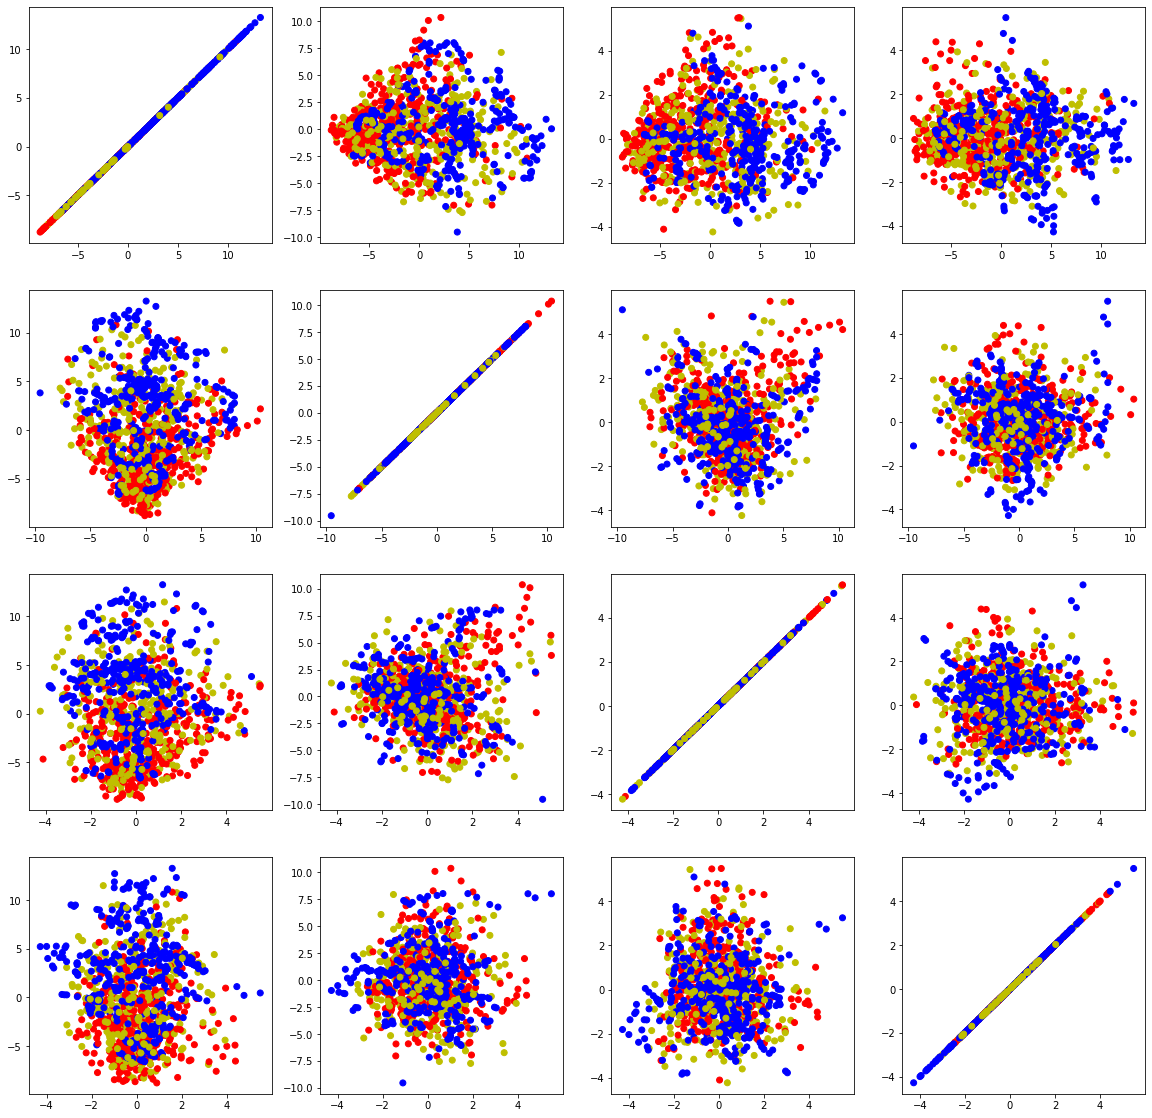

In [32]:
skbest_X = SelectKBest(score_func=chi2, k=20).fit_transform(features,label)

scaler =StandardScaler()
Xs = scaler.fit_transform(skbest_X)

# def mahalanobis(x=None, data=None, cov=None):
#     """Compute the Mahalanobis Distance between each row of x and the data  
#     x    : vector or matrix of data with, say, p columns.
#     data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
#     cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
#     """
#     x_minus_mu = x - np.mean(data)
#     if not cov:
#         cov = np.cov(data.values.T)
#     inv_covmat = sp.linalg.inv(cov)
#     left_term = np.dot(x_minus_mu, inv_covmat)
#     mahal = np.dot(left_term, x_minus_mu.T)
#     return mahal.diagonal()

# df_x = skbest_X.head(20)
# df_x['mahala'] = mahalanobis(x=df_x, data=skbest_X)
# df_x.head()

X_train,X_test,y_train,y_test = train_test_split(skbest_X,label,test_size=0.3,random_state=None,shuffle=True)

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

n_components = 4
pca = PCA(n_components)
pca_fit = pca.fit_transform(X_res)
colors = ['r','g','b','y']

fig, axes = plt.subplots(n_components, n_components, figsize=(20,20))
for i in range(n_components):
    for j in range(n_components):
        axes[i, j].scatter(pca_fit[:, i], pca_fit[:, j],c = y_res, cmap = mpl.colors.ListedColormap(colors))

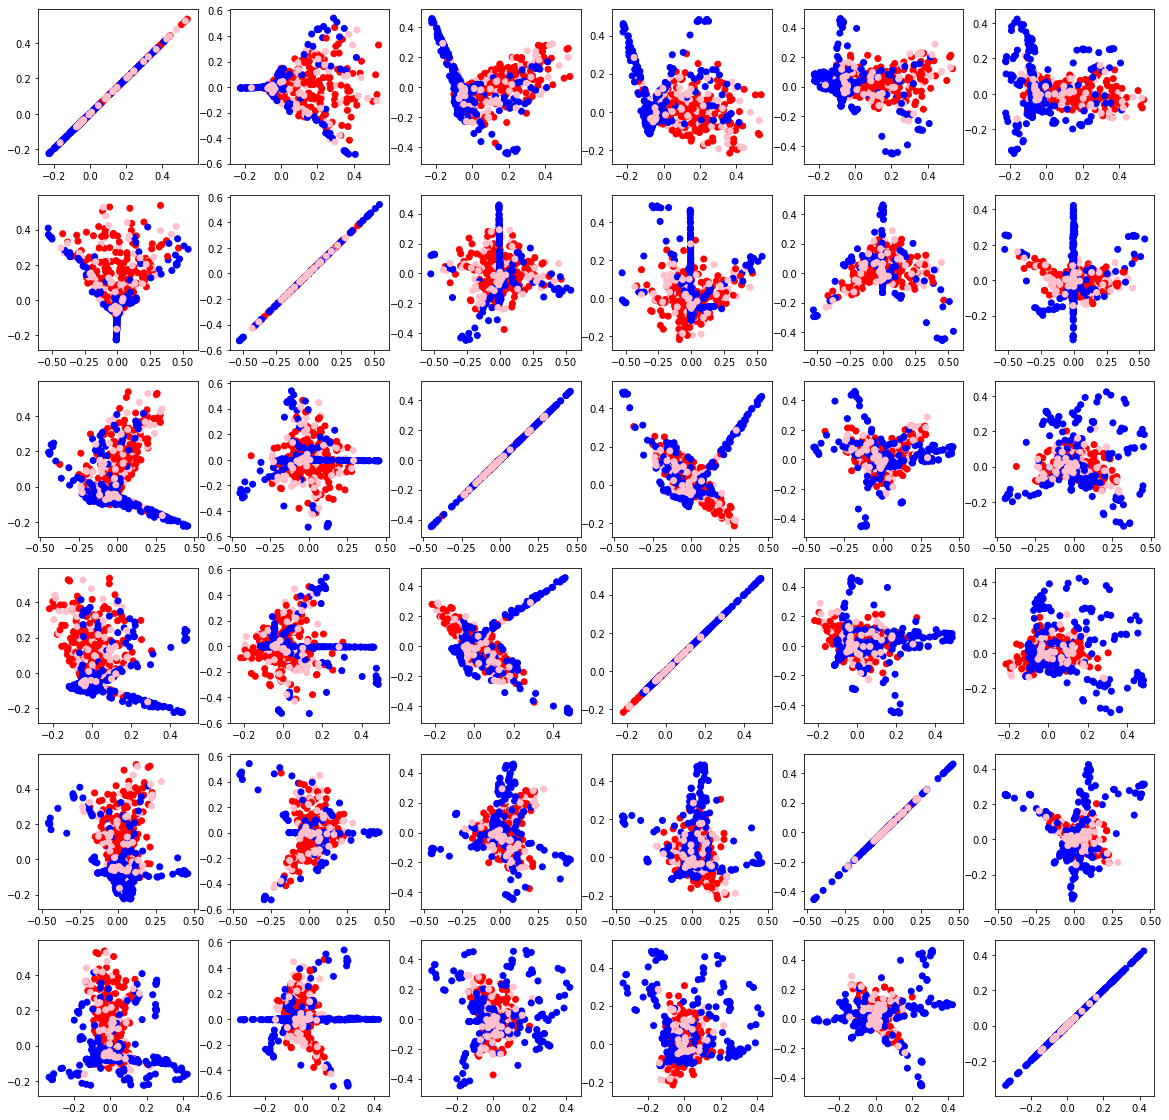

In [34]:
n_components = 6
kpca = KernelPCA(kernel = 'rbf', gamma = 0.2, n_components=6)
kpca_fit = kpca.fit_transform(X_res)
colors = ['r','g','b','pink']

fig, axes = plt.subplots(n_components, n_components, figsize=(20,20))

for i in range(n_components):
    for j in range(n_components):
#         class_filter = Y == 2
        axes[i, j].scatter(kpca_fit[:, i], kpca_fit[:, j], c = y_res, cmap = mpl.colors.ListedColormap(colors))
#         axes[i, j].scatter(kpca_fit[class_filter, i], kpca_fit[class_filter, j])

In [136]:
svm = SVC(kernel='rbf',random_state=None, gamma=0.06, C=10)
svm = svm.fit(X_res,y_res)

print("SVM Classifier")
score_train = svm.score(X_res, y_res)
print("training_score",score_train)

res = cross_val_score(svm, X_res, y_res, cv=10, n_jobs=-1, scoring='accuracy')
print('Validation Accuracy:\t{0:.4f}'.format(res.mean()* 100))

y_predsvm = svm.fit(X_test,y_test).predict(X_test) 

print(classification_report(y_test, y_predsvm))
# cf_matrix=confusion_matrix(y_test, y_predsvm)

# sns.heatmap(cf_matrix, annot=True)
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_predsvm).sum()))

print("accuracy_score",accuracy_score(y_test, y_predsvm))
print(X_test)
print(y_test)
print(y_predsvm)

SVM Classifier
training_score 0.9939759036144579
Validation Accuracy:	72.8927
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       1.00      1.00      1.00        44
           2       0.99      0.99      0.99       132

    accuracy                           0.99       336
   macro avg       1.00      1.00      1.00       336
weighted avg       0.99      0.99      0.99       336


Number of mislabeled points out of a total 336 points: 2
accuracy_score 0.9940476190476191
[[ 6.47975987  7.37634505  6.47052915 ...  9.15818984  6.03903622
   7.55409935]
 [ 8.37738443  6.10334088  7.8490169  ...  8.7690199   7.54016288
   6.2216935 ]
 [ 7.82717319  8.36807195  8.06930195 ...  8.8763329  11.04847676
   7.66192452]
 ...
 [ 6.25985405 10.73470034  6.68124898 ...  7.39206996  7.26800063
   9.69919121]
 [ 7.81465811  8.25345801  7.40198659 ... 10.88395217  9.73885942
   8.96448283]
 [ 6.76644924  6.17665376  6.75248887 .


Naive Bayes
training_score 0.6372712146422629
Validation Accuracy:	61.6490
              precision    recall  f1-score   support

           1       0.92      0.66      0.77       274
           2       0.17      0.42      0.24        12
           3       0.75      1.00      0.86         6
           4       0.25      0.59      0.36        44

    accuracy                           0.65       336
   macro avg       0.52      0.67      0.56       336
weighted avg       0.80      0.65      0.70       336

accuracy_score 0.6488095238095238

Number of mislabeled points out of a total 336 points: 118


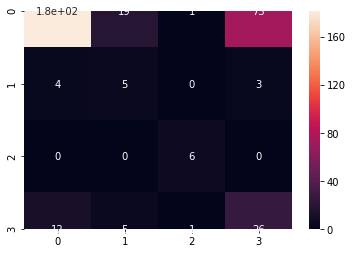

In [58]:
# 2. NAIVE BAYES METHOD

nb = GaussianNB()
print("\nNaive Bayes")

nb.fit(X_res, y_res)#FIT THE TRAINING DATA IN THE MODEL
score_train = nb.score(X_res, y_res)
print("training_score",score_train)

res = cross_val_score(nb, X_res, y_res, cv=10, n_jobs=-1, scoring='accuracy')
print('Validation Accuracy:\t{0:.4f}'.format(res.mean()* 100))

y_pred_nb = nb.fit(X_test, y_test).predict(X_test)# PREDICT THE CLASSES FOR TEST DATA

print(classification_report(y_test, y_pred_nb))
nb_matrix=confusion_matrix(y_test, y_pred_nb)

sns.heatmap(nb_matrix, annot=True)

print("accuracy_score",accuracy_score(y_test, y_pred_nb))
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_pred_nb).sum()))

Random Forest Classifier 

training_score 0.9850249584026622
validation_score 0.9850249584026622
              precision    recall  f1-score   support

           1       0.95      1.00      0.98       274
           2       1.00      0.58      0.74        12
           3       1.00      1.00      1.00         6
           4       1.00      0.82      0.90        44

    accuracy                           0.96       336
   macro avg       0.99      0.85      0.90       336
weighted avg       0.96      0.96      0.96       336

accuracy_score 0.9613095238095238

Number of mislabeled points out of a total 336 points: 13
RERE 0.10421557672015533
RNF165 0.06486295828525646
SLC9A1 0.054353912473928775
AK055082 0.05406984206495025
ATP6V1C2 0.05333526591346218
LIN52 0.05149533845509151
GRM1 0.050610943899947934
BC033982 0.04932699143399822
FXN 0.04924103652992134
AI082173 0.04858088426395045
PAPD4 0.04826860156804279
CD049690 0.04674018325541453
F3 0.04618941529014478
SLC17A3 0.045569376494126

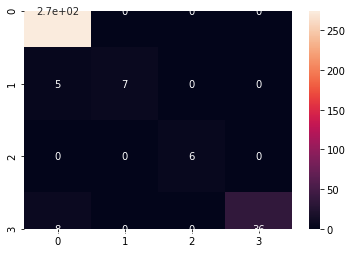

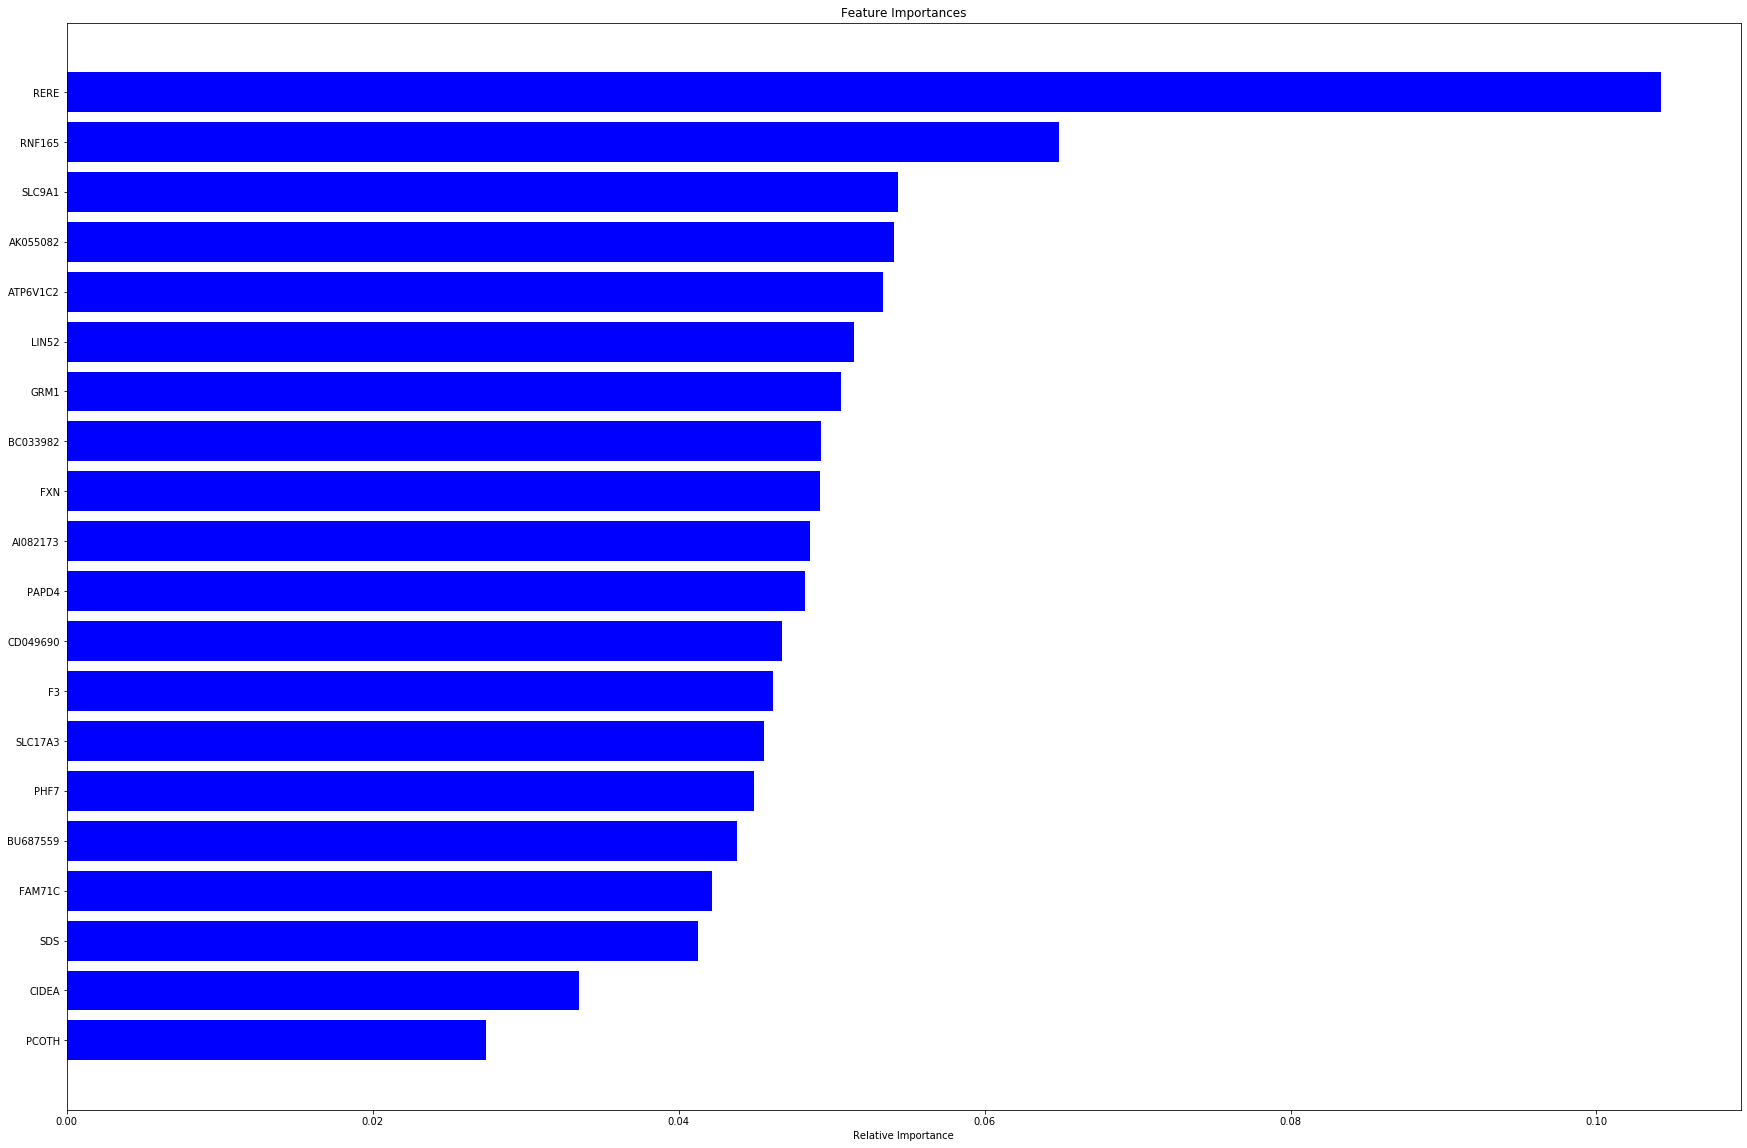

In [59]:
rf_pp = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=8, criterion = 'gini',max_features= 'auto')
rf_pp.fit(X_res,y_res)

print("Random Forest Classifier",'\n')
score_train = rf_pp.score(X_res,y_res)
print("training_score",score_train)

score_test = rf_pp.score(X_res,y_res)
print("validation_score",score_test)

y_predrf = rf_pp.fit(X_test,y_test).predict(X_test) 

print(classification_report(y_test, y_predrf))
rf_matrix=confusion_matrix(y_test, y_predrf)

sns.heatmap(rf_matrix, annot=True)
print("accuracy_score",accuracy_score(y_test, y_predrf))
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_predrf).sum()))

# Look at our feature importances without the dummy variables
original_feature_dict = {}
for feature, importance in zip(list(X), rf_pp.feature_importances_):
    # Check for our dummy variable delimeter --
    if '--' in feature:
        original_feature_name = feature.split('--')[0]
    else:
        original_feature_name = feature
        
    # Add to our original_feature_dict, incrememnt if it's already there
    if original_feature_name in original_feature_dict:
        original_feature_dict[original_feature_name] += importance
    else:
        original_feature_dict[original_feature_name] = importance
      
# sort the original_feature_dict
sorted_importance = sorted(original_feature_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(feature, importance)

features= list(X)
importances = rf_pp.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(30,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression 

training_score 0.7221297836938436
validation_score 0.49702380952380953
              precision    recall  f1-score   support

           1       0.84      0.98      0.90       274
           2       0.50      0.08      0.14        12
           3       1.00      0.83      0.91         6
           4       0.29      0.05      0.08        44

    accuracy                           0.82       336
   macro avg       0.66      0.49      0.51       336
weighted avg       0.75      0.82      0.77       336

accuracy_score 0.8244047619047619

Number of mislabeled points out of a total 336 points: 59


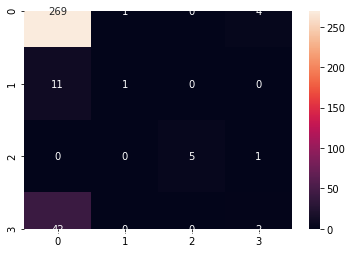

In [76]:

logit = LogisticRegression()
logit.fit(X_res, y_res)
print("Logistic Regression",'\n')
score_train = logit.score(X_res, y_res)
print("training_score",score_train)
score_test = logit.score(X_test, y_test)
print("validation_score",score_test)

y_logit = logit.fit(X_test, y_test).predict(X_test) 
print(classification_report(y_test, y_logit))
log_matrix=confusion_matrix(y_test, y_logit)

sns.heatmap(log_matrix, annot=True,fmt='g')
print("accuracy_score",accuracy_score(y_test, y_logit))
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_logit).sum()))

XGBOOST 

training_score 1.0
Validation Accuracy:	50.9195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       186

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

accuracy_score 1.0

Number of mislabeled points out of a total 372 points: 0


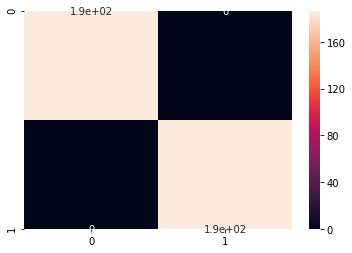

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y_res,test_size=0.3,random_state=42,stratify=y_res)
gbm = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 100, alpha = 10, n_estimators = 100).fit(X_train,y_train)

print("XGBOOST",'\n')
score_train = gbm.score(X_train, y_train)
print("training_score",score_train)
res = cross_val_score(gbm, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Validation Accuracy:\t{0:.4f}'.format(res.mean()* 100))

y_xgboost = gbm.fit(X_test,y_test).predict(X_test) 
print(classification_report(y_test, y_xgboost))
XGB_matrix=confusion_matrix(y_test, y_xgboost)

sns.heatmap(XGB_matrix, annot=True)
print("accuracy_score",accuracy_score(y_test, y_xgboost))
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test.shape[0],(y_test != y_xgboost).sum()))

Gradient_Boosting 

training_score 0.7407834101382489
Validation Accuracy:	59.4453
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       186
           1       0.81      0.79      0.80       186

    accuracy                           0.80       372
   macro avg       0.80      0.80      0.80       372
weighted avg       0.80      0.80      0.80       372

accuracy_score 0.803763440860215

Number of mislabeled points out of a total 372 points: 73


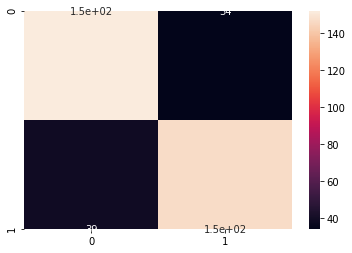

In [15]:
X_train_gb,X_test_gb,y_train_gb,y_test_gb = train_test_split(X_pca,y_res,test_size=0.3,
                                                             random_state=42,stratify=y_res)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_gb, 
                                                                                                      y_train_gb)

print("Gradient_Boosting",'\n')

score_train = clf.score(X_train_gb, y_train_gb)
print("training_score",score_train)

res = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Validation Accuracy:\t{0:.4f}'.format(res.mean()* 100))

y_pred = clf.fit(X_test_gb,y_test_gb).predict(X_test_gb) 
print(classification_report(y_test, y_pred))
GB_matrix=confusion_matrix(y_test, y_pred)

sns.heatmap(GB_matrix, annot=True)
print("accuracy_score",accuracy_score(y_test_gb, y_pred))
print("\nNumber of mislabeled points out of a total %d points: %d"  % (X_test_gb.shape[0],(y_test_gb != y_pred).sum()))
